In [1]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("train.csv")
grp = train_data.groupby(['Sex', 'Pclass'])  
train_data.Age = grp.Age.apply(lambda x: x.fillna(x.median()))
train_data.Age.fillna(train_data.Age.median, inplace = True)
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
test_data = pd.read_csv("test.csv")
grp = test_data.groupby(['Sex', 'Pclass'])  
test_data.Age = grp.Age.apply(lambda x: x.fillna(x.median()))
test_data.Age.fillna(test_data.Age.median, inplace = True)
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

y = train_data["Survived"]

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
X = train_data[features]
X_test = test_data[features]
X = pd.get_dummies(train_data[features], columns=["Sex"])
X_test = pd.get_dummies(test_data[features], columns=["Sex"])

In [5]:
params = {
    'n_estimators' : range(10, 100, 10),
    'criterion' : ['entropy', 'gini'],
    'max_depth' : range(1, 13),
    'min_samples_leaf' : range(1, 10),
    'min_samples_split' : range(2, 10, 2)
}

rf = RandomForestClassifier(random_state=0)
rand_cv_rf = RandomizedSearchCV(rf, params, cv=5)

In [6]:
rand_cv_rf.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 13),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(10, 100, 10)})

In [7]:
rand_cv_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 12,
 'criterion': 'gini'}

In [8]:
rand_cv_rf.best_score_

0.8316740945326722

<AxesSubplot:xlabel='importance'>

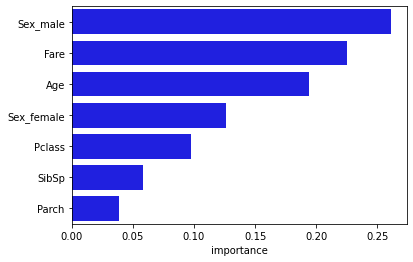

In [9]:
model = rand_cv_rf.best_estimator_
fimp = pd.DataFrame(model.feature_importances_,
                    index=X.columns, columns=['importance']) \
                    .sort_values('importance', ascending=False)
sns.barplot(x="importance", y=fimp.index, data=fimp,
            label="Feature importances", color="b")

In [10]:
predictions = model.predict(X_test)

In [12]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

In [14]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
